## Data anlaysis task

In [3]:
import pandas as pd

In [4]:
import re

In [5]:
df_admin = pd.read_excel('NZ_Admin_JOBS.xlsx', header= None)

### 1.1 Filling missing value

In [6]:
df_admin.isna().sum()

0     0
1     0
2    22
3     0
4     0
5     0
dtype: int64

In [7]:
df_admin.fillna('unknown', inplace = True)

### 1.2  drop duplicate rows

In [8]:
df_admin.drop_duplicates(inplace = True)

### 2.  split column 3 into location and area

In [9]:
df_admin[['location','area']] = df_admin[3].str.split('area:', expand = True)

In [10]:
df_admin.drop(3, axis = 1, inplace = True)

#### fillna for the area column

In [11]:
df_admin.isna().sum()

0             0
1             0
2             0
4             0
5             0
location      0
area        541
dtype: int64

In [12]:
df_admin['area'].fillna('unknown', inplace = True)

#### modify location column -- get rid of 'location:'

In [13]:
def apply_location(x):
    return x[9:]

In [14]:
df_admin['location'] = df_admin['location'].apply(apply_location)

#### modify location -- get rid of repeated text

In [15]:
def apply_repeated(x):
    middle = len(x)//2
    if x != 'unknown':
        return x[:middle + 1]
    else:
        return 'unknown'

In [16]:
df_admin['location'] = df_admin['location'].apply(apply_repeated)

#### clean the area column (get rid of unrelated information)

In [17]:
df_admin['area'] = df_admin['area'].str.split(',', expand = True)[0]

In [18]:
df_admin['area'] = df_admin['area'].apply(apply_repeated)

### 3. split column 5 into classification/Classification

In [19]:
df_admin[['classification','Classification']] = df_admin[5].str.split('Classification:', expand = True)

In [20]:
df_admin.drop(5, axis = 1, inplace = True)

#### modify the classification column to get rid of "classification:"

In [21]:
def apply_class(x, index):
    if '$' not in x:
        return x[index:]
    else:
        return x

In [22]:
#df_admin['classification'] = df_admin['classification'].apply(apply_class, args = (15,))

#### fillna for the column "Classification"

In [23]:
df_admin.isna().sum()

0                   0
1                   0
2                   0
4                   0
location            0
area                0
classification      0
Classification    603
dtype: int64

In [24]:
df_admin['Classification'].fillna('unknown', inplace = True)

#### modify the coloumn Classification - get rid of repeated text

In [25]:
df_admin['Classification'] = df_admin['Classification'].apply(apply_repeated)

### 4. split column 4 into posted time and featured at

In [26]:
df_admin[['posted time','featured at']] = df_admin[4].str.split(',', expand = True)[[0,2]]

In [27]:
df_admin.drop(4, axis = 1, inplace = True)

#### fillna for featured at

In [28]:
df_admin['featured at'].fillna('unknown', inplace = True)

### 5. create a new column "salary"

In [29]:
def apply_salary(x):
    if 'classification:' in x:
        return 'unknown'
    else:
        return x

In [30]:
df_admin['salary'] = df_admin['classification'].apply(apply_salary)

### 6. get rid of unrelated information in the classification content

In [31]:
def apply_classification(x):
    if 'classification:' in x:
        return x[15:]
    else:
        return 'unknown'

In [32]:
df_admin['classification'] = df_admin['classification'].apply(apply_classification)

In [33]:
df_admin.rename(columns={0:'Job Title', 1:'from website', 2:'company name'}, inplace = True)

## Classification: seperate the categries connected with '&'

In [34]:
df_admin[['classification1','classification2','classification3']] = df_admin['classification'].str.split('&', expand = True).fillna('unknown')

In [35]:
df_admin.drop('classification', axis = 1, inplace = True)

In [36]:
df_admin

,Job Title,from website,company name,location,area,Classification,posted time,featured at,salary,classification1,classification2,classification3
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,unknown,Bay of Plenty,Tauranga,Office Management,Featured,Private Advertiser,unknown,Administration,Office SupportAdministration,Office Supportsub
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Bay of Plenty,Tauranga,Receptionists,Featured,unknown,unknown,Administration,Office SupportAdministration,Office Supportsub
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,Auckland,unknown,Other,4d ago,unknown,unknown,Administration,Office SupportAdministration,Office Supportsub
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,Southland,Invercargill,Administrative Assistants,1h ago,unknown,unknown,Administration,Office SupportAdministration,Office Supportsub
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,unknown,Canterbury,Christchurch,Client & Sales Administration,4d ago,Private Advertiser,unknown,Administration,Office SupportAdministration,Office Supportsub
...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,Auckland,Auckland Central,Client & Sales Administration,27d ago,unknown,unknown,Administration,Office SupportAdministration,Office Supportsub
2704,Executive Assistant,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,Wellington,Wellington Central,unknown,27d ago,unknown,Competitive hourly rate,unknown,unknown,unknown
2705,Temporary Office Roles,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,Waikato,Hamilton,unknown,20d ago,unknown,Competitive hourly rates $$,unknown,unknown,unknown
2706,Temporary Office Roles,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,Waikato,Hamilton,unknown,28d ago,unknown,Competitive hourly rates $$,unknown,unknown,unknown


##  Salary: provide salary expectation, eg: unknown salary -> average salary rate

找出所有有数字的行并进行简单清洗

In [37]:
df_admin[df_admin.salary.str.contains('\d', na = False)]['salary']

12                           $20 per hour
17                  $20 - $24.99 per hour
23                    $19 to $22 per hour
25                  $20 - $24.99 per hour
36                  $20 - $24.99 per hour
                      ...                
683     $35 - $40 p.h. + + 8% Holiday Pay
695                             Circa 50k
1936     $24 - $28 p.h.  + 8% Holiday Pay
1937    $35 - $40 p.h. + + 8% Holiday Pay
1949                            Circa 50k
Name: salary, Length: 96, dtype: object

In [38]:
df_admin[df_admin['salary'].str.contains('\dk', na = False)]['salary']

306                                      $75k - $85k p.a.
442                    $60k-$70k depending on experience!
473     $60 - $65k + Career Progression to QS / leader...
644                     $50k - $65k p.a. + plus kiwisaver
650                                        $70-$80k+Super
663                                     $70-75k per annum
695                                             Circa 50k
1949                                            Circa 50k
Name: salary, dtype: object

In [39]:
df_admin['salary'] = df_admin[df_admin['salary'].str.contains('\d',na = False)]['salary'].\
str.replace('5k','5000', regex = True)

In [40]:
df_admin['salary'] = df_admin[df_admin['salary'].str.contains('\d',na = False)]['salary'].\
str.replace('0k','0000', regex = True)

In [41]:
df_admin['salary'] = df_admin[df_admin['salary'].str.contains('\d', na = False)]\
['salary'].str.replace(' to ', '-', regex = True)

In [42]:
df_admin['salary'] = df_admin[df_admin['salary'].str.contains('\d', na = False)]['salary']\
.str.replace('\d\%', '', regex = True)

In [43]:
df_admin['salary'] = df_admin[df_admin['salary'].str.contains('\d', na = False)]\
['salary'].str.replace(',','')

In [44]:
df_admin['salary'].fillna('unknown', inplace = True)

In [45]:
df_admin[['min_salary','max_salary','nothing']] = df_admin['salary'].str.split('-', expand = True)

In [46]:
df_admin[df_admin['salary'].str.contains('\d', na = False)]\
[['min_salary','max_salary','nothing']]

,min_salary,max_salary,nothing
12,$20 per hour,None,None
17,$20,$24.99 per hour,None
23,$19,$22 per hour,None
25,$20,$24.99 per hour,None
36,$20,$24.99 per hour,None
...,...,...,...
683,$35,$40 p.h. + + Holiday Pay,None
695,Circa 50000,None,None
1936,$24,$28 p.h. + Holiday Pay,None
1937,$35,$40 p.h. + + Holiday Pay,None


In [47]:
df_admin['min_salary'] = df_admin['min_salary'].str.replace(' ','')

In [48]:
df_admin['max_salary'] = df_admin['max_salary'].str.replace(' ', '')

In [49]:
df_admin['min_salary'] = df_admin[df_admin['min_salary'].str.contains('\d', na = False)]\
['min_salary'].str.extract('(\d+.?\d+)')

In [50]:
df_admin['max_salary'] = df_admin[df_admin['max_salary'].str.contains('\d', na = False)]\
['max_salary'].str.extract('(\d+.?\d+)')

In [51]:
df_admin.drop('nothing', axis = 1, inplace = True)

In [52]:
df_admin['min_salary'].fillna('unknown', inplace = True)

In [53]:
df_admin['max_salary'].fillna('unknown', inplace = True)

In [54]:
import numpy as np
np.random.randint(45000, 75000, size = 1)

array([53153])

In [55]:
for r, row in enumerate(df_admin['min_salary'].values):
    if row == 'unknown':
        df_admin['min_salary'][r] = np.random.randint(45000, 75000,\
                                                      size = 1)[0]

In [56]:
for r, row in enumerate(df_admin['max_salary'].values):
    if row == 'unknown':
        df_admin['max_salary'][r] = np.random.randint(45000, 75000,\
                                                     size = 1)[0]

In [57]:
df_admin['min_salary'] = df_admin['min_salary'].astype('float')

In [58]:
df_admin['max_salary'] = df_admin['max_salary'].astype('float')

In [59]:
df_admin.loc[df_admin['min_salary'] < 200, 'min_salary'] = \
df_admin['min_salary']*8*200

In [60]:
df_admin.loc[df_admin['max_salary'] < 200, 'max_salary'] = \
df_admin['max_salary']*8*200

## Normalization

In [61]:
df_admin['min_salary'].min()

29600.0

In [62]:
def normalization(x, column_name):
    return (x - df_admin[column_name].min())/(df_admin[column_name].max() - df_admin[column_name].min())

In [63]:
df_admin['min_salary_normalzied'] = df_admin['min_salary'].apply(normalization, args = ('min_salary',))

In [64]:
df_admin['max_salary_normalzied'] = df_admin['max_salary'].apply(normalization, args = ('max_salary',))

## standradization

In [65]:
df_admin['min_salary'].mean()

59573.0258493353

In [66]:
def standardization(x, column_name):
    return (x-df_admin[column_name].mean())/df_admin[column_name].std()

In [67]:
df_admin['min_salary_standardized'] = df_admin['min_salary'].apply(standardization, args = ('min_salary',))

In [68]:
df_admin['max_salary_standardized'] = df_admin['max_salary'].apply(standardization, args = ('min_salary',))

In [69]:
df_admin

,Job Title,from website,company name,location,area,Classification,posted time,featured at,salary,classification1,classification2,classification3,min_salary,max_salary,min_salary_normalzied,max_salary_normalzied,min_salary_standardized,max_salary_standardized
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,unknown,Bay of Plenty,Tauranga,Office Management,Featured,Private Advertiser,unknown,Administration,Office SupportAdministration,Office Supportsub,73170.0,68696.0,0.528762,0.360948,1.451513,0.973902
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Bay of Plenty,Tauranga,Receptionists,Featured,unknown,unknown,Administration,Office SupportAdministration,Office Supportsub,62931.0,70773.0,0.404502,0.383330,0.358473,1.195627
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,Auckland,unknown,Other,4d ago,unknown,unknown,Administration,Office SupportAdministration,Office Supportsub,49213.0,55847.0,0.238022,0.222489,-1.105960,-0.397763
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,Southland,Invercargill,Administrative Assistants,1h ago,unknown,unknown,Administration,Office SupportAdministration,Office Supportsub,47002.0,46305.0,0.211189,0.119666,-1.341991,-1.416397
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,unknown,Canterbury,Christchurch,Client & Sales Administration,4d ago,Private Advertiser,unknown,Administration,Office SupportAdministration,Office Supportsub,58768.0,58915.0,0.353981,0.255550,-0.085939,-0.070246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,Auckland,Auckland Central,Client & Sales Administration,27d ago,unknown,unknown,Administration,Office SupportAdministration,Office Supportsub,49044.0,56676.0,0.235971,0.231422,-1.124002,-0.309265
2704,Executive Assistant,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,Wellington,Wellington Central,unknown,27d ago,unknown,unknown,unknown,unknown,unknown,71426.0,67251.0,0.507597,0.345377,1.265337,0.819644
2705,Temporary Office Roles,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,Waikato,Hamilton,unknown,20d ago,unknown,unknown,unknown,unknown,unknown,50601.0,48040.0,0.254867,0.138362,-0.957788,-1.231181
2706,Temporary Office Roles,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,Waikato,Hamilton,unknown,28d ago,unknown,unknown,unknown,unknown,unknown,45927.0,71894.0,0.198143,0.395409,-1.456750,1.315297


In [70]:
# def apply_salary(x):
#     if len(re.findall(r'\d+', x)) == 0:
#         return 'unknown'
#     else:
#         return x

# re.findall(r'\d+.*\d+','20')[0]

# df_admin['salary'] = df_admin['salary'].apply(apply_salary)

# def generate_max_salary(x):
#     value = re.findall(r'\d+\.?\d+',x)
#     if len(value) > 1:
#         return value[1]
#     else:
#         return 'unknown'

# df_admin['max_salary'] = df_admin['salary'].apply(generate_max_salary)

# def apply_salary1(x):
#     if len(re.findall(r'\d+\.?\d+', x)):
#         value = re.findall(r'\d+\.?\d+',x)[0]
#         if float(re.sub(r'[ \,]+','',value)) < 2000:
#             return float(re.sub(r'[ \,]+','',value))*8*200
#         return re.sub(r'[ \,]+','',value)
#     else:
#         return 0

# df_admin['min_salary'] = df_admin['salary']

# df_admin['min_salary'] = df_admin['min_salary'].apply(apply_salary1)

# df_admin['max_salary'] = df_admin['max_salary'].apply(apply_salary1)

# ##### drop掉df_admin['salary']

# df_admin.drop('salary', axis = 1, inplace = True)

# ##### 求出该列平均值

# def compute_mean(x):
#     index = 0
#     sumvalue = 0
#     for i in x:
#         if float(i) == 0:
#             continue
#         else:
#             sumvalue += float(i)
#             index += 1
#     return sumvalue/index

# ##### 工资这里有不同的单位 有时薪 有年薪

# min_salary_mean = compute_mean(df_admin['min_salary'])

# max_salary_mean = compute_mean(df_admin['max_salary'])

# def fillvalue(x, mean):
#     if x == 0:
#         return mean
#     else:
#         return x

# df_admin['min_salary'] = df_admin['min_salary'].apply(fillvalue, args = (min_salary_mean,))

# df_admin['max_salary'] = df_admin['max_salary'].apply(fillvalue, args = (max_salary_mean,))

##  Convert posted_time to integer

In [71]:
#convert to day for every cell

In [72]:
df_admin['posted time']

0       Featured
1       Featured
2         4d ago
3         1h ago
4         4d ago
          ...   
2703     27d ago
2704     27d ago
2705     20d ago
2706     28d ago
2707     26d ago
Name: posted time, Length: 2708, dtype: object

In [73]:
for i in df_admin['posted time']:
    print(i)

Featured
Featured
4d ago
1h ago
4d ago
9m ago
5d ago
7m ago
2h ago
3d ago
7d ago
5d ago
8d ago
3d ago
3d ago
5d ago
4h ago
6d ago
3d ago
7d ago
2d ago
3d ago
Featured
Featured
3d ago
4d ago
2d ago
3d ago
3d ago
4h ago
6d ago
3d ago
4d ago
5d ago
3d ago
5d ago
4d ago
5h ago
4d ago
5d ago
3d ago
3d ago
4h ago
3d ago
Featured
Featured
4d ago
4h ago
3d ago
4d ago
3d ago
7d ago
6d ago
7d ago
6d ago
6d ago
3d ago
6d ago
5d ago
5d ago
11d ago
5d ago
3d ago
8d ago
5h ago
3d ago
Featured
Featured
5d ago
3d ago
6d ago
6d ago
7d ago
3d ago
4d ago
3d ago
3d ago
6d ago
6d ago
5d ago
5d ago
3d ago
3d ago
4d ago
6d ago
5d ago
4d ago
7d ago
Featured
Featured
7d ago
2h ago
5d ago
5d ago
6d ago
11d ago
4d ago
5d ago
3d ago
10d ago
3d ago
3d ago
3d ago
6d ago
7d ago
6d ago
10d ago
5d ago
6d ago
3d ago
Featured
Featured
8d ago
11d ago
4d ago
7d ago
7d ago
5d ago
4d ago
6d ago
12d ago
5d ago
5d ago
5d ago
3d ago
3d ago
7d ago
4d ago
5d ago
6d ago
7d ago
3d ago
Featured
Featured
6d ago
5d ago
7d ago
5d ago


In [74]:
re.findall(r'\d+', '7d ago')[0]

'7'

In [75]:
def apply_posted_time(x):
    if x == 'Featured':
        return 'unKnown'
    if 'm' in x:
        return float(re.findall(r'\d+', x)[0])*30
    elif 'h' in x:
        return float(re.findall(r'\d+', x)[0])/24
    elif 'd' in x:
        return float(re.findall(r'\d+', x)[0])

In [76]:
df_admin['posted time'] = df_admin['posted time'].apply(apply_posted_time)

In [77]:
def compute_mean(x):
    index = 0
    sumvalue = 0
    for i in x:
        if i != 'unKnown':
            sumvalue += float(i)
            index += 1  
    return sumvalue/index

In [78]:
compute_mean(df_admin['posted time'])

21.938058035714285

In [79]:
df_admin['posted time'] = df_admin['posted time'].replace('unKnown',compute_mean(df_admin['posted time']))

## Featured at: the column is not very meaningful, try to merge this column to company name column

In [80]:
df_admin['company name'] = df_admin['company name'].replace('unknown','Private Advertiser')

In [81]:
df_admin.drop('featured at', axis = 1, inplace = True)

## 6. Change dtypes from object to a proper data type (integer, string, double, etc.)

In [82]:
df_admin['Job Title'] = df_admin['Job Title'].astype('string')

In [83]:
df_admin['company name'] = df_admin['company name'].astype('string')

In [84]:
df_admin['location'] = df_admin['location'].astype('string')

In [85]:
df_admin['area'] = df_admin['area'].astype('string')

In [86]:
df_admin['Classification'] = df_admin['Classification'].astype('string')

In [87]:
df_admin['classification1'] = df_admin['classification1'].astype('string')

In [88]:
df_admin['classification2'] = df_admin['classification2'].astype('string')

In [89]:
df_admin['classification3'] = df_admin['classification3'].astype('string')

In [90]:
df_admin['posted time'] = df_admin['posted time'].astype('int')

In [91]:
df_admin['max_salary'] = df_admin['max_salary'].astype('float')

In [92]:
df_admin['min_salary'] = df_admin['min_salary'].astype('float')

In [93]:
df_admin.dtypes

Job Title                   string
from website                object
company name                string
location                    string
area                        string
Classification              string
posted time                  int64
salary                      object
classification1             string
classification2             string
classification3             string
min_salary                 float64
max_salary                 float64
min_salary_normalzied      float64
max_salary_normalzied      float64
min_salary_standardized    float64
max_salary_standardized    float64
dtype: object

In [94]:
df_admin

,Job Title,from website,company name,location,area,Classification,posted time,salary,classification1,classification2,classification3,min_salary,max_salary,min_salary_normalzied,max_salary_normalzied,min_salary_standardized,max_salary_standardized
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,Private Advertiser,Bay of Plenty,Tauranga,Office Management,21,unknown,Administration,Office SupportAdministration,Office Supportsub,73170.0,68696.0,0.528762,0.360948,1.451513,0.973902
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Bay of Plenty,Tauranga,Receptionists,21,unknown,Administration,Office SupportAdministration,Office Supportsub,62931.0,70773.0,0.404502,0.383330,0.358473,1.195627
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,Auckland,unknown,Other,4,unknown,Administration,Office SupportAdministration,Office Supportsub,49213.0,55847.0,0.238022,0.222489,-1.105960,-0.397763
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,Southland,Invercargill,Administrative Assistants,0,unknown,Administration,Office SupportAdministration,Office Supportsub,47002.0,46305.0,0.211189,0.119666,-1.341991,-1.416397
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,Private Advertiser,Canterbury,Christchurch,Client & Sales Administration,4,unknown,Administration,Office SupportAdministration,Office Supportsub,58768.0,58915.0,0.353981,0.255550,-0.085939,-0.070246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,Auckland,Auckland Central,Client & Sales Administration,27,unknown,Administration,Office SupportAdministration,Office Supportsub,49044.0,56676.0,0.235971,0.231422,-1.124002,-0.309265
2704,Executive Assistant,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,Wellington,Wellington Central,unknown,27,unknown,unknown,unknown,unknown,71426.0,67251.0,0.507597,0.345377,1.265337,0.819644
2705,Temporary Office Roles,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,Waikato,Hamilton,unknown,20,unknown,unknown,unknown,unknown,50601.0,48040.0,0.254867,0.138362,-0.957788,-1.231181
2706,Temporary Office Roles,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,Waikato,Hamilton,unknown,28,unknown,unknown,unknown,unknown,45927.0,71894.0,0.198143,0.395409,-1.456750,1.315297


## Plotting

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### 1.salary distribution

#### Histogram

Text(0.5, 1.0, 'Miniumn salary distribution')

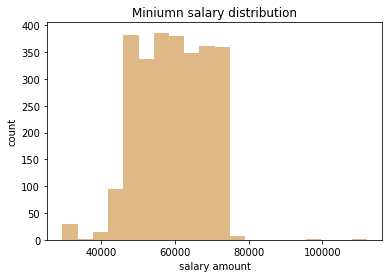

In [97]:
#matplotlib
plt.hist(df_admin['min_salary'], bins = 20, color= 'burlywood')
plt.xlabel('salary amount')
plt.ylabel('count')
plt.title('Miniumn salary distribution')

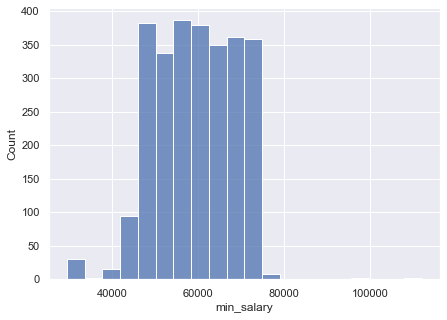

In [216]:
#seaborn
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(7, 5))
sns.histplot(df_admin['min_salary'],palette="light:m_r", bins = 20)

#### Boxplot & violinplot

Text(0.5, 1.0, 'max_salary distribution')

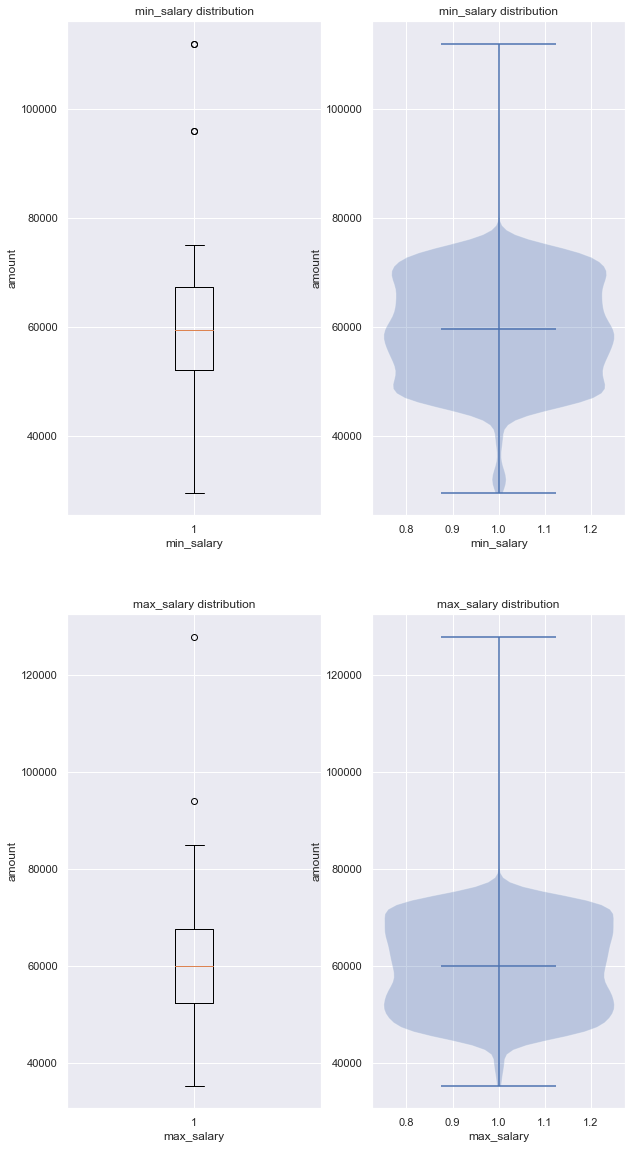

In [152]:
#matplotlib

#min_salary
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 20))
axs[0][0].boxplot(df_admin['min_salary'])
axs[0][0].set_xlabel('min_salary')
axs[0][0].set_ylabel('amount')
axs[0][0].set_title('min_salary distribution')
axs[0][1].violinplot(df_admin['min_salary'], showmeans = True)
axs[0][1].set_xlabel('min_salary')
axs[0][1].set_ylabel('amount')
axs[0][1].set_title('min_salary distribution')

#max_salary
axs[1][0].boxplot(df_admin['max_salary'])
axs[1][0].set_xlabel('max_salary')
axs[1][0].set_ylabel('amount')
axs[1][0].set_title('max_salary distribution')
axs[1][1].violinplot(df_admin['max_salary'], showmeans = True)
axs[1][1].set_xlabel('max_salary')
axs[1][1].set_ylabel('amount')
axs[1][1].set_title('max_salary distribution')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'min_salary distribution')

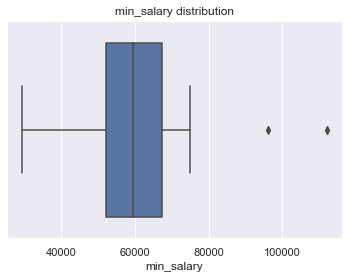

In [177]:
#seaborn
sns.boxplot(df_admin['min_salary'])
plt.title('min_salary distribution')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'min_salary distribution')

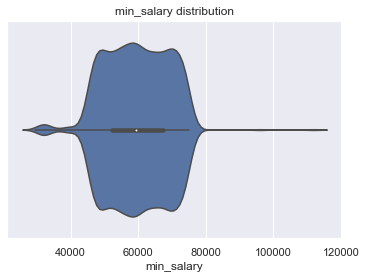

In [143]:
#seaborn
sns.violinplot(df_admin['min_salary'])
plt.title('min_salary distribution')

### 2. time and salary

(0, 500)

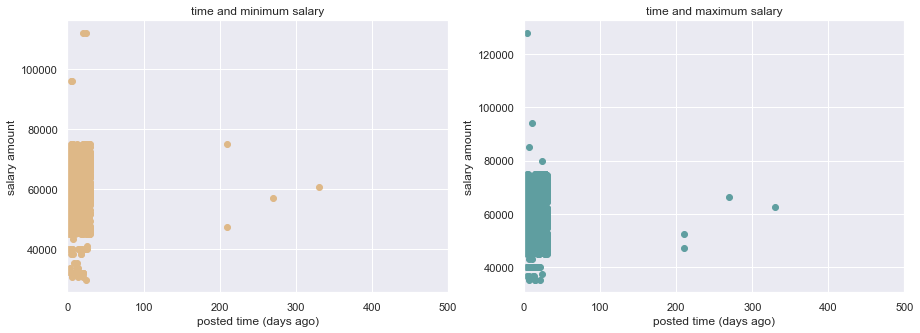

In [218]:
#matplotlib
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs[0].scatter(df_admin['posted time'],df_admin['min_salary'], color = 'burlywood')
axs[1].scatter(df_admin['posted time'],df_admin['max_salary'], color = 'cadetblue')
axs[0].set_title('time and minimum salary')
axs[0].set_xlabel('posted time (days ago)')
axs[0].set_ylabel('salary amount')
axs[0].set_xlim(0,500)
axs[1].set_title('time and maximum salary')
axs[1].set_xlabel('posted time (days ago)')
axs[1].set_ylabel('salary amount')
axs[1].set_xlim(0,500)

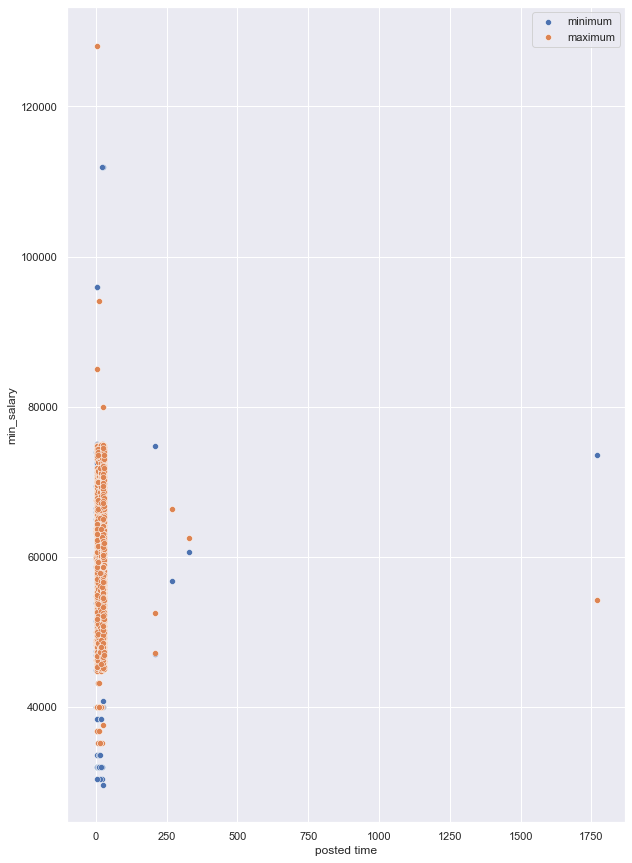

In [233]:
#seaborn
f, ax = plt.subplots(figsize=(10, 15))
sns.scatterplot(x = df_admin['posted time'],y = df_admin['min_salary'], label = 'minimum')
sns.scatterplot(x = df_admin['posted time'],y = df_admin['max_salary'], label = 'maximum')

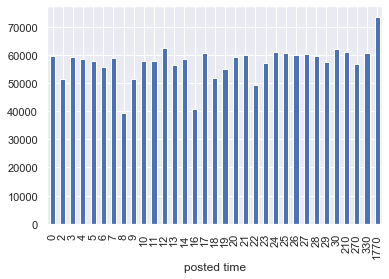

In [247]:
#matplotlib
df_admin.groupby('posted time')['min_salary'].median().plot(kind = 'bar')

In [253]:
flights = sns.load_dataset("flights")

In [256]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


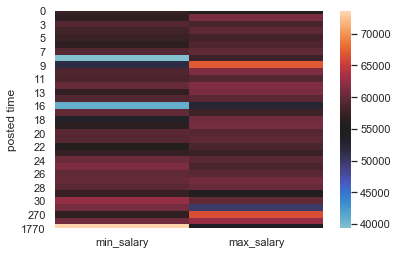

In [268]:
#seaborn heatmap
sns.heatmap(df_admin.groupby('posted time')['min_salary','max_salary'].mean(), center = 55000)

### 3.Area and Salary

In [180]:
#清洗location
df_admin['location'].value_counts()
df_admin.loc
df_admin.loc[df_admin['max_salary'] < 200, 'max_salary'] = \
df_admin['max_salary']*8*200

 Auckland                       889
 Wellington                     780
 Waikato                        404
 Canterbury                     203
 Bay of Plenty                   93
 Manawatu                        92
 Northland                       78
 WellingtonWellington,A          70
 Otago                           40
 Hawkes Bay                      19
 Taranaki                        10
 Tasman                           8
 Southland                        7
 Marlborough                      4
 Gisborne                         4
 WellingtonWellingto              2
 AucklandAuckland,$21 - $         1
 AucklandAuckland                 1
 West Coast                       1
 WellingtonWellington,$50k -      1
 WellingtonWellington             1
Name: location, dtype: Int64

In [191]:
df_admin.loc[df_admin['location'].str.contains('Auckland'), 'location'] = 'Auckland'

In [192]:
df_admin.loc[df_admin['location'].str.contains('Wellington'), 'location'] = 'Wellington'

In [194]:
#清洗location
df_admin['location'].value_counts()

Auckland          891
Wellington        854
 Waikato          404
 Canterbury       203
 Bay of Plenty     93
 Manawatu          92
 Northland         78
 Otago             40
 Hawkes Bay        19
 Taranaki          10
 Tasman             8
 Southland          7
 Gisborne           4
 Marlborough        4
 West Coast         1
Name: location, dtype: Int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

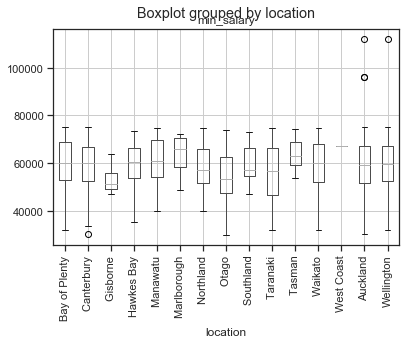

In [212]:
#matplotlib
df_admin.boxplot(column = 'min_salary', by = 'location')
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

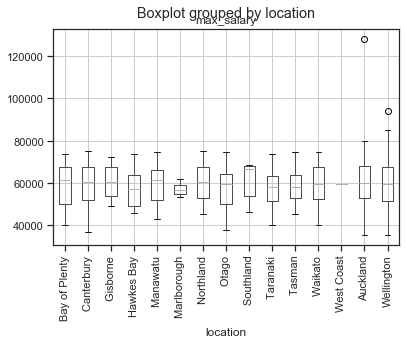

In [213]:
#matplotlib
df_admin.boxplot(column = 'max_salary', by = 'location')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

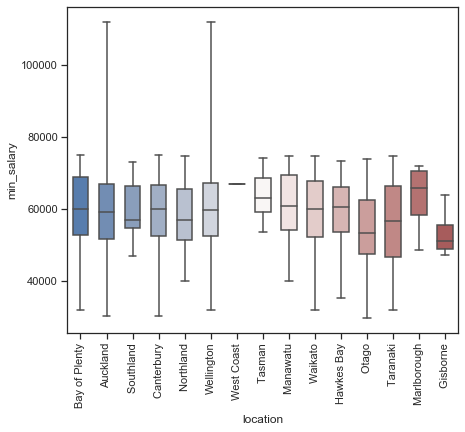

In [198]:
#seaborn facet_grid 
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="location", y="min_salary", data=df_admin,
            whis=[0, 100], width=.6, palette="vlag")
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

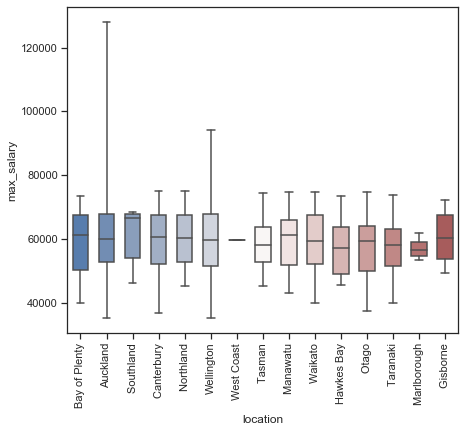

In [199]:
#seaborn facet_grid 
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="location", y="max_salary", data=df_admin,
            whis=[0, 100], width=.6, palette="vlag")
plt.xticks(rotation = 90)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


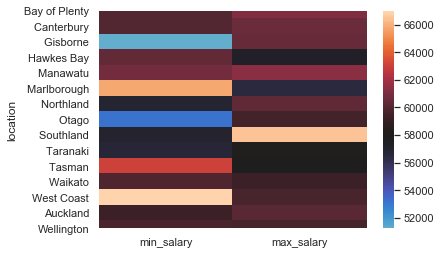

In [267]:
#heatmap
sns.heatmap(df_admin.groupby('location')['min_salary','max_salary'].median(), center = 58000)